In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import *

from scipy import stats
import datetime as dt

import matplotlib.pyplot as plt
import statsmodels.api as sm

import pickle

In [68]:
# Loading stocks
y_pred1 = pickle.load(open('mlp_predict.pkl', 'rb' ))
y_pred2 = pickle.load(open('mlp_predict_2.pkl', 'rb' ))
#y_pred3 = pickle.load(open('mlp_predict_3.pkl', 'rb' ))
y_pred4 = pickle.load(open('mlp_predict_4.pkl', 'rb' ))
y_pred5 = pickle.load(open('mlp_predict_5.pkl', 'rb' ))

In [69]:
#y_pred1.shape, y_pred2.shape, y_pred3.shape, y_pred4.shape, y_pred5.shape

In [87]:
y_pred = np.mean(np.array([y_pred1, y_pred2, y_pred4, y_pred5]), axis=0 )
#y_pred = np.mean(np.array([y_pred1, y_pred2,y_pred3,y_pred4, y_pred5]), axis=0 )

In [88]:
y_pred = y_pred.ravel()

In [89]:
# Importing y
y = pd.read_csv('y_reg.csv')
y['date'] =  pd.to_datetime(y['date'])
y = y.set_index(['date'])
y_test = y[y.index > '1975-12-01']
y_test = y_test.values.ravel()

In [90]:
y_pred.shape, y_test.shape

((270000,), (270000,))

In [91]:
spear = []
for i in range(len(y_pred)//500):       
    spear.append(stats.spearmanr(y_pred[i*500:(i+1)*500], y_test[i*500:(i+1)*500])[0])
spear

[-0.09566182134814437,
 0.04810101433758823,
 -0.01468144184623528,
 0.06518996399277309,
 0.07141848962172448,
 0.01985570704842574,
 0.04966870293761443,
 0.13040738253683448,
 -0.013884431061512863,
 0.06764209887963196,
 0.07344832445555433,
 -0.10734263562202395,
 0.12965581308487073,
 -0.03526587500127466,
 -0.0135835346390706,
 0.16294744916173523,
 0.05301891807811966,
 -0.04069476847353346,
 1.2729787284458349e-05,
 -0.09981548095608332,
 0.07389880319657359,
 0.06382910765245743,
 -0.04105803717039206,
 0.010992015931035253,
 -0.03269427234300506,
 0.04828057176838502,
 -0.04749064101371828,
 -0.1562319334109966,
 -0.013820894711961608,
 0.16309029123181082,
 -0.018326512315667627,
 -0.10399677375663906,
 0.04125719116187806,
 -0.020486660244308796,
 -0.03825576943921802,
 0.018037550382566023,
 -0.006173521717875993,
 0.07038665763597339,
 -0.09154038373908406,
 0.09319421235419006,
 0.06600314793933425,
 -0.017704627520761615,
 -0.07926436332203171,
 0.011816203597121355,
 

In [92]:
np.mean(spear),np.std(spear,ddof=1)

(0.009638575883214687, 0.08747121682632772)

In [93]:
stats.ttest_1samp(spear, 0.0)

Ttest_1sampResult(statistic=2.560616753574947, pvalue=0.010719946435112655)

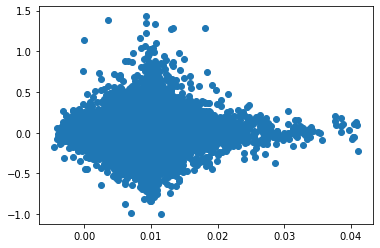

In [94]:
plt.scatter(y_pred,y_test)

In [95]:
# Testing R2
r2_df = pd.DataFrame()
r2_df['y'] = y_test
r2_df['y_hat'] = y_pred
r2_df['difference'] = (r2_df['y']-r2_df['y_hat'])
r2_df['y_2'] = r2_df['y']**2
r2_df['dif2'] = r2_df['difference']**2
y_2 = r2_df['y_2'].sum() 
dif2 = r2_df['dif2'].sum()
print(1 - (dif2 / y_2))

0.005948358516487451


In [96]:
# Loading stock universe
universe_test = pd.read_csv('universe_test.csv')

In [97]:
# Insert predictions
universe_test.insert(1, "y_hat", y_pred)

In [98]:
y_rank = universe_test.copy()

In [99]:
y_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    270000 non-null  object 
 1   y_hat   270000 non-null  float32
 2   permno  270000 non-null  int64  
dtypes: float32(1), int64(1), object(1)
memory usage: 5.1+ MB


In [100]:
y_rank

,date,y_hat,permno
0,1976-01-01,0.010218,10137
1,1976-01-01,0.009974,10145
2,1976-01-01,0.010605,10161
3,1976-01-01,0.010797,10225
4,1976-01-01,0.009432,10233
...,...,...,...
269995,2020-12-01,0.010078,93096
269996,2020-12-01,0.010007,93132
269997,2020-12-01,0.012856,93246
269998,2020-12-01,0.010485,93312


In [101]:
y_rank['y_hat'].nunique()

224713

In [102]:
y_rank.shape

(270000, 3)

In [113]:
y_rank

,date,y_hat,permno
0,1976-01-01,0.016125,51377
1,1976-01-01,0.014711,15560
2,1976-01-01,0.014088,21709
3,1976-01-01,0.013946,16870
4,1976-01-01,0.013705,59328
...,...,...,...
269995,2020-12-01,0.003962,80191
269996,2020-12-01,0.003856,15826
269997,2020-12-01,0.003822,54148
269998,2020-12-01,0.002732,15643


In [124]:
y_rank['y_hat'].drop_duplicates(inplace=True)

In [125]:
# For each date, ranking stocks into 1-10 portfolios based on cumret
# 1 = loser, 10 = winner portfolio 

y_rank = y_rank.groupby('date').apply(lambda x: x.sort_values(['y_hat'], ascending = False)).reset_index(drop=True)
y_rank['rank'] = y_rank.groupby('date')['y_hat'].transform(lambda x: pd.qcut(x, 10, labels=False))

# For visualization: Shift momr from 0-9 to 1-10 
y_rank['rank']=1+y_rank['rank']

ValueError: Bin edges must be unique: array([-0.00062172,  0.00891777,  0.00970551,  0.01022271,  0.01046101,
        0.01054889,  0.01057762,  0.01057762,  0.01079992,  0.01112204,
        0.01348953]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:
# Average cumulative return for each portfolio
y_rank.groupby('rank')['y_hat'].mean()

### 2. Merging daily data with MLP rank

In [ ]:
# Loading daily returns
d_ret1 = pd.read_csv('daily_1931.csv')
d_ret1['daily_date'] = pd.to_datetime(d_ret1.daily_date)

In [ ]:
d_ret1

In [ ]:
# Preparing date colmn in "universe" for merge

#Rename date column to merge
y_rank.rename(columns={'date':'monthly_date'}, inplace=True)

#Make datatime format
y_rank['monthly_date'] = pd.to_datetime(y_rank.monthly_date)

# Create date for merging
y_rank['date_merge'] = y_rank['monthly_date']
y_rank['date_merge'] = y_rank['date_merge'].dt.strftime("%Y/%m")

In [ ]:
# Merge on monthly date
daily = pd.merge(d_ret1, y_rank, on=['date_merge', 'permno'], how='left')

In [ ]:
# Looking at daily data
daily.head()

In [ ]:
# Filter on non-nans
daily_filtered = daily[daily['rank'].notna()]

In [ ]:
# Ensure returns are number format
daily_filtered['ret'] = daily_filtered['ret'].astype(float)

In [ ]:
# Creating dateframe for portfolio calculation
port_d_return = pd.DataFrame(daily_filtered[['daily_date', 'ret', 'rank']])

In [ ]:
# Calculating mean (portfolio return), for a given date, rank
port_d_return = port_d_return.groupby(['daily_date','rank'])['ret'].mean().reset_index()
port_d_return_t = port_d_return.copy()

In [ ]:
# Check portfolio return
port_d_return_t.groupby('rank')['ret'].describe()[['count','mean','std']].reset_index()

In [ ]:
# Transpose portfolio layout to have columns as portfolio returns
port_d_return_t = port_d_return.pivot(index='daily_date', columns='rank', values='ret')

# Add prefix port in front of each column
port_d_return_t = port_d_return_t.add_prefix('P')

In [ ]:
port_d_return_t.head()

In [ ]:
# Creating long-short portfolio
port_d_return_t = port_d_return_t.rename(columns={'P1.0':'losers', 'P10.0':'winners'})
port_d_return_t['long_short'] = port_d_return_t.winners - port_d_return_t.losers

In [ ]:
port_d_return_t

In [ ]:
# Ensuring no NAN-values
port_d_return_t['long_short'].isnull().sum()

In [ ]:
# OBS FILLING WITH NA - should not be necessary with new file
port_d_return_t['long_short'] = port_d_return_t['long_short'].fillna(0)
port_d_return_t['long_short'].isnull().sum()

In [ ]:
# Defining long_short return
long_short_ret = port_d_return_t['long_short']
long_short_ret

In [ ]:
# Dropping NA values
long_short_ret = long_short_ret[long_short_ret.index != '1985-09-27']
long_short_ret = long_short_ret[long_short_ret.index != '2012-10-29']
long_short_ret = long_short_ret[long_short_ret.index != '2017-09-30']

In [ ]:
# Save to CSV
long_short_ret.to_csv('mlp_results.csv', index=True)